# Exploratory Data RUL Casting Steel

### Import Library

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Get Dataset

In [9]:
df = pd.read_csv('../data/raw/ccm_rul_dataset.csv')
df.head()

,date,"workpiece_weight, tonn",steel_type,doc_requirement,cast_in_row,workpiece_slice_geometry,alloy_type,"steel_weight_theoretical, tonn","slag_weight_close_grab1, tonn","metal_residue_grab1, tonn",...,"Al, %","Ca, %","N, %","Pb, %","Mg, %","Zn, %",sleeve,num_crystallizer,num_stream,RUL
0,2020-01-05,144.9,Arm240,DOC 34028-2016,4,150x150,open,145.3,1.8,0.4,...,0.0022,0.0008,0.0085,0.0,0.0,0.0,30012261,22,4,384.0
1,2020-01-05,165.9,St3sp,Contract,10,150x150,open,166.3,1.8,0.4,...,0.0028,0.0004,0.0049,0.0,0.0,0.0,30013346,2,1,1037.0
2,2020-01-05,168.0,Arm240,DOC 34028-2016,5,150x150,open,168.4,1.8,0.4,...,0.0031,0.0011,0.0068,0.0,0.0,0.0,30012261,22,4,355.0
3,2020-01-05,170.1,St3sp,Contract,7,150x150,open,170.5,1.8,0.4,...,0.0034,0.0005,0.0051,0.0,0.0,0.0,30012261,22,4,300.0
4,2020-01-05,163.8,St3sp,Contract,12,150x150,open,164.2,1.8,0.4,...,0.0032,0.0004,0.0038,0.0,0.0,0.0,30012261,22,4,164.0


In [10]:
df.shape

(17503, 57)

In [11]:
df["date"] = pd.to_datetime(df["date"])

print(df.shape)
df.head()

(17503, 57)


,date,"workpiece_weight, tonn",steel_type,doc_requirement,cast_in_row,workpiece_slice_geometry,alloy_type,"steel_weight_theoretical, tonn","slag_weight_close_grab1, tonn","metal_residue_grab1, tonn",...,"Al, %","Ca, %","N, %","Pb, %","Mg, %","Zn, %",sleeve,num_crystallizer,num_stream,RUL
0,2020-01-05,144.9,Arm240,DOC 34028-2016,4,150x150,open,145.3,1.8,0.4,...,0.0022,0.0008,0.0085,0.0,0.0,0.0,30012261,22,4,384.0
1,2020-01-05,165.9,St3sp,Contract,10,150x150,open,166.3,1.8,0.4,...,0.0028,0.0004,0.0049,0.0,0.0,0.0,30013346,2,1,1037.0
2,2020-01-05,168.0,Arm240,DOC 34028-2016,5,150x150,open,168.4,1.8,0.4,...,0.0031,0.0011,0.0068,0.0,0.0,0.0,30012261,22,4,355.0
3,2020-01-05,170.1,St3sp,Contract,7,150x150,open,170.5,1.8,0.4,...,0.0034,0.0005,0.0051,0.0,0.0,0.0,30012261,22,4,300.0
4,2020-01-05,163.8,St3sp,Contract,12,150x150,open,164.2,1.8,0.4,...,0.0032,0.0004,0.0038,0.0,0.0,0.0,30012261,22,4,164.0


#### Check Missing Values

In [12]:
missing_pct = (
    df.isna()
      .mean()
      .sort_values(ascending=False)
      .mul(100)
)

missing_pct[missing_pct > 0]


technical_trim, tonn                                           99.565789
residuals_grab2, tonn                                          97.069074
Sn, %                                                          87.122208
Ce, %                                                          31.023253
quantity, tonn                                                 12.929212
kind                                                           12.929212
grab1_num                                                       1.548306
RUL                                                             1.279781
resistance, tonn                                                1.279781
temperature_measurement2, Celsius deg.                          0.148546
temperature_measurement1, Celsius deg.                          0.148546
grab2_num                                                       0.091413
water_consumption_secondary_cooling_zone_num3, liter/minute     0.079986
Mo, %                                              

C:\Users\Axel\AppData\Local\Temp\ipykernel_8896\2539362205.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


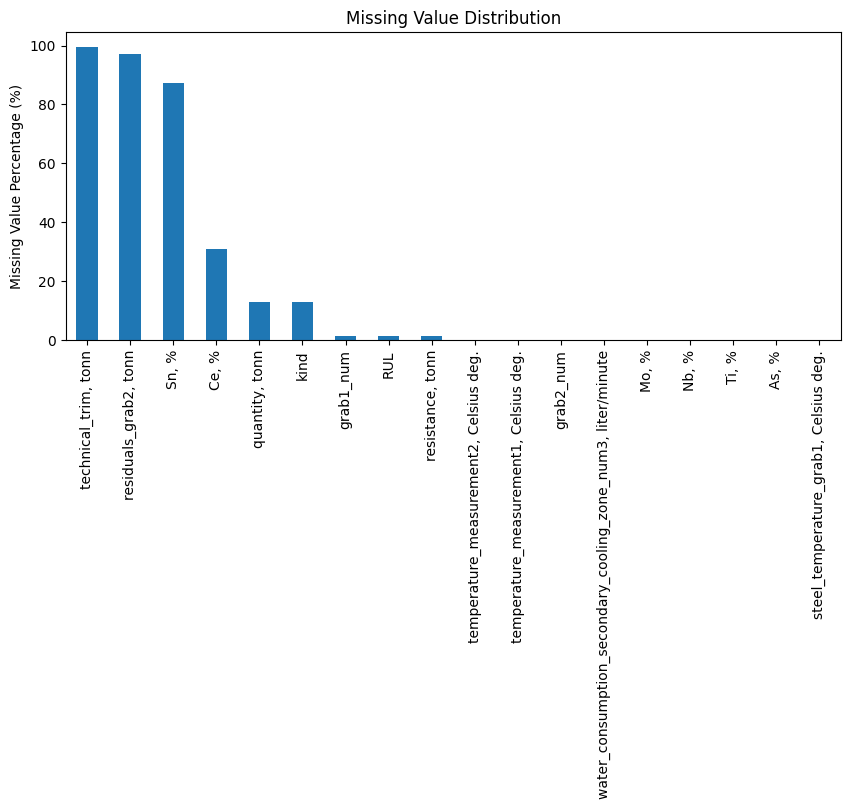

In [13]:
plt.figure(figsize=(10, 4))
missing_pct[missing_pct > 0].plot(kind="bar")
plt.ylabel("Missing Value Percentage (%)")
plt.title("Missing Value Distribution")
plt.tight_layout()
plt.show()

#### Physical Sanity Checks

In [14]:
# Negative or impossible values
sanity_checks = {
    "negative_weight": (df["steel_weight, tonn"] < 0).sum(),
    "negative_torque": (df["resistance, tonn"] < 0).sum(),
    "extreme_temperature": (
        (df["steel_temperature_grab1, Celsius deg."] < 1000) |
        (df["steel_temperature_grab1, Celsius deg."] > 1800)
    ).sum()
}

sanity_checks

{'negative_weight': 0, 'negative_torque': 0, 'extreme_temperature': 9}

#### Weight Consistency

In [15]:
df["weight_diff"] = (
    df["steel_weight, tonn"]
    - df["steel_weight_theoretical, tonn"]
)

df["weight_diff"].describe()

count    17503.000000
mean        -0.422716
std          0.978337
min        -50.000000
25%         -0.400000
50%         -0.400000
75%         -0.400000
max         -0.400000
Name: weight_diff, dtype: float64

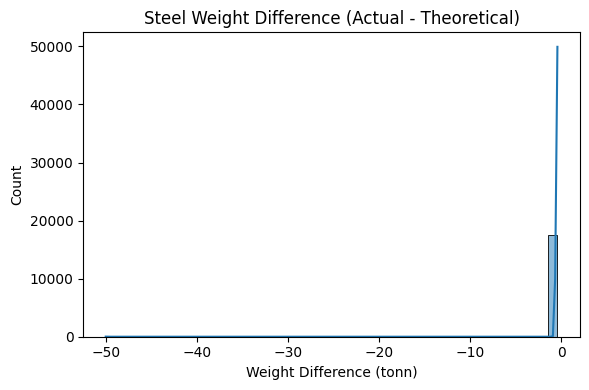

In [18]:
plt.figure(figsize=(6, 4))
sns.histplot(df["weight_diff"], bins=50, kde=True)
plt.title("Steel Weight Difference (Actual - Theoretical)")
plt.xlabel("Weight Difference (tonn)")
plt.tight_layout()
plt.show()

#### Temporal Behavior & RUL Degradation

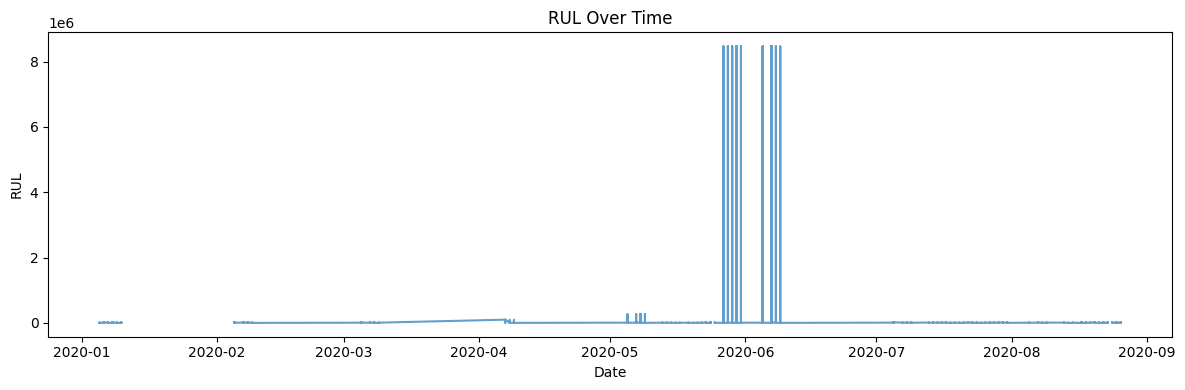

In [19]:
plt.figure(figsize=(12, 4))
plt.plot(df["date"], df["RUL"], alpha=0.7)
plt.title("RUL Over Time")
plt.xlabel("Date")
plt.ylabel("RUL")
plt.tight_layout()
plt.show()


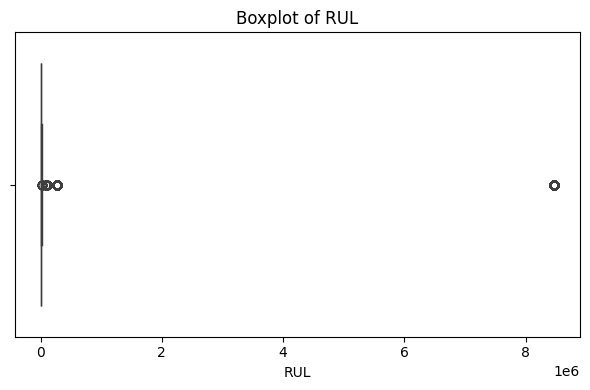

In [35]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["RUL"])
plt.title("Boxplot of RUL")
plt.tight_layout()
plt.show()

In [36]:
q1, q3 = df["RUL"].quantile([0.25, 0.75])
iqr = q3 - q1
lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr

mask = df["RUL"].between(lower, upper)
df_iqr = df.loc[mask].copy()

df_iqr.shape

(16605, 59)

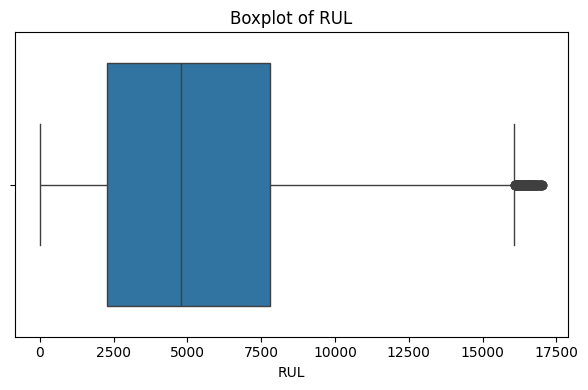

In [37]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df_iqr["RUL"])
plt.title("Boxplot of RUL")
plt.tight_layout()
plt.show()

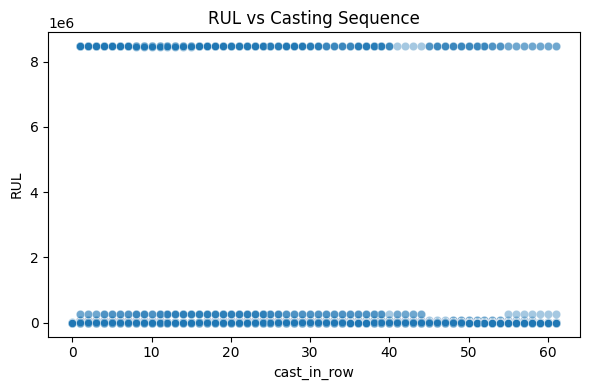

In [20]:
plt.figure(figsize=(6, 4))
sns.scatterplot(
    x="cast_in_row",
    y="RUL",
    data=df,
    alpha=0.4
)
plt.title("RUL vs Casting Sequence")
plt.tight_layout()
plt.show()


#### RUL Distribution & Outliers

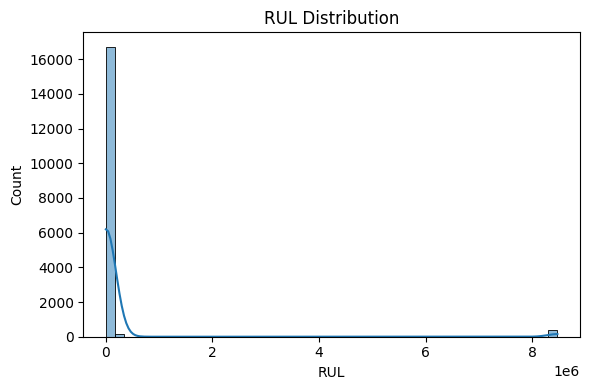

In [21]:
plt.figure(figsize=(6, 4))
sns.histplot(df["RUL"], bins=50, kde=True)
plt.title("RUL Distribution")
plt.tight_layout()
plt.show()

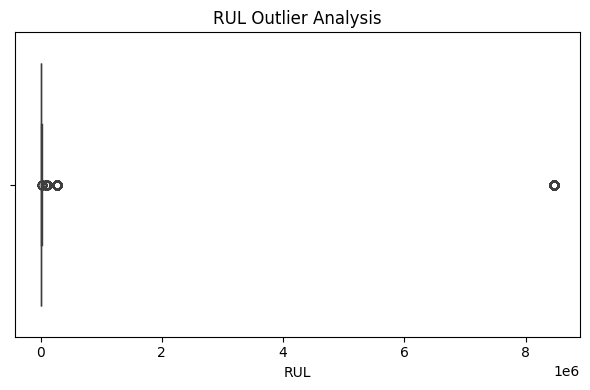

In [22]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["RUL"])
plt.title("RUL Outlier Analysis")
plt.tight_layout()
plt.show()

## Correlation & Multicollinearity Analysis

#### Numerical Feature Correlation

In [ ]:
num_cols = df.select_dtypes(include="number").columns

corr = df[num_cols].corr()

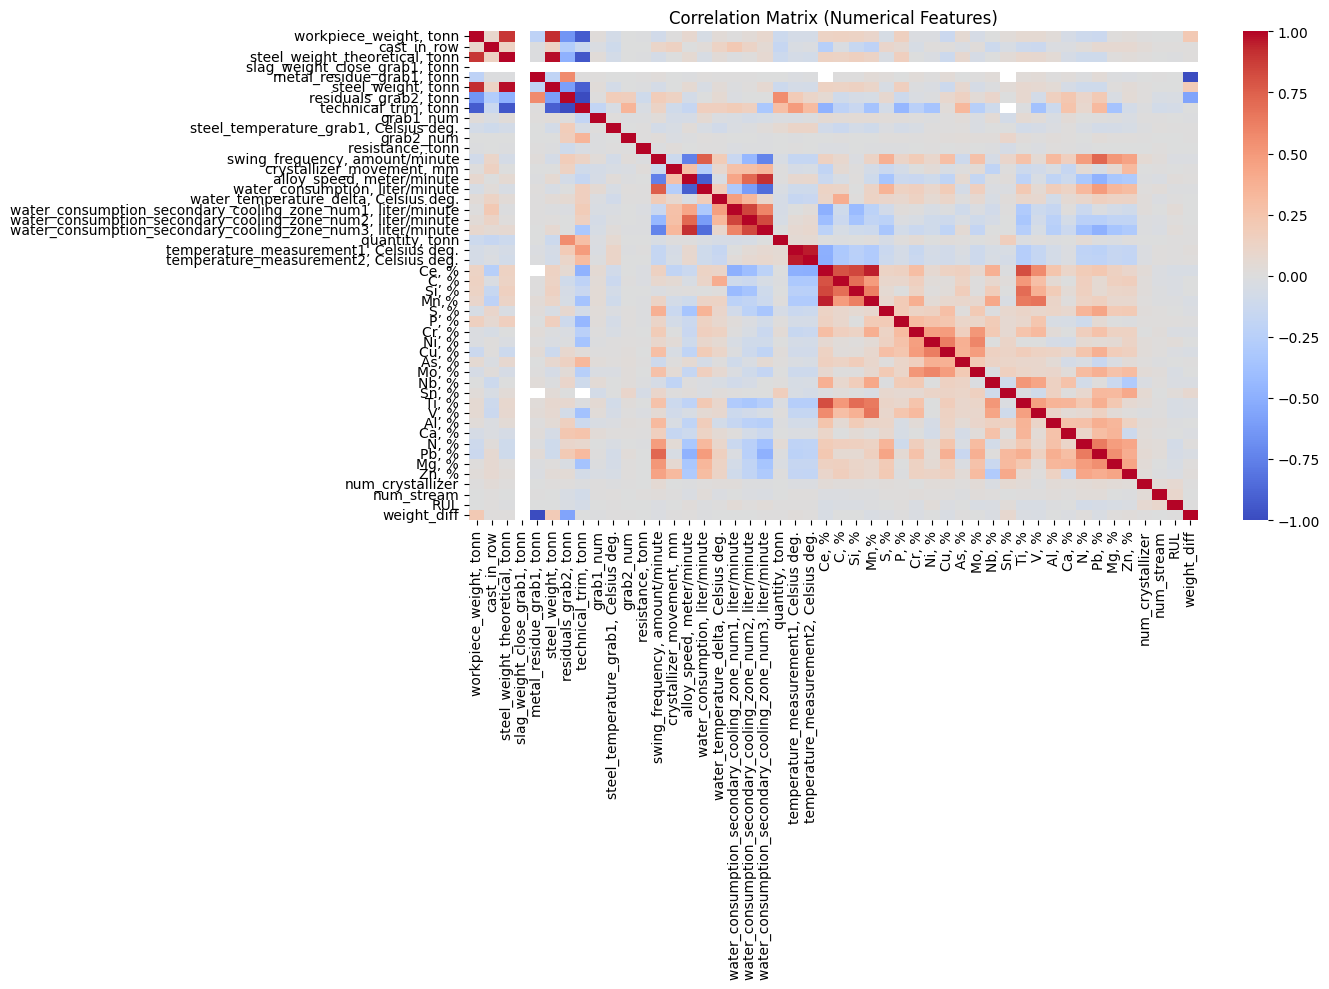

In [24]:
plt.figure(figsize=(14, 10))
sns.heatmap(
    corr,
    cmap="coolwarm",
    center=0,
    vmax=1,
    vmin=-1
)
plt.title("Correlation Matrix (Numerical Features)")
plt.tight_layout()
plt.show()


#### Top Correlations with RUL

In [25]:
corr_rul = (
    corr["RUL"]
    .drop("RUL")
    .sort_values()
)

corr_rul.head(10), corr_rul.tail(10)


(N, %                    -0.076428
 technical_trim, tonn    -0.070260
 Pb, %                   -0.054763
 Mg, %                   -0.043410
 Ti, %                   -0.042451
 V, %                    -0.039864
 Ce, %                   -0.039603
 Mo, %                   -0.036696
 residuals_grab2, tonn   -0.032326
 Zn, %                   -0.029748
 Name: RUL, dtype: float64,
 cast_in_row                                                    0.012286
 P, %                                                           0.015468
 alloy_speed, meter/minute                                      0.018531
 water_consumption_secondary_cooling_zone_num3, liter/minute    0.025727
 Sn, %                                                          0.025871
 Ni, %                                                          0.029446
 water_consumption_secondary_cooling_zone_num1, liter/minute    0.031974
 num_crystallizer                                               0.065645
 num_stream                           

## Operational Regime Analysis

#### RUL by Steel Type

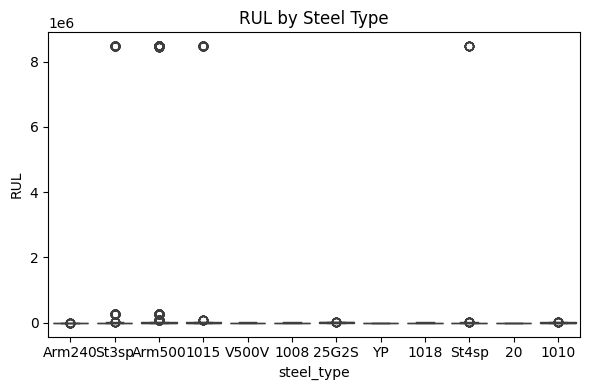

In [26]:
plt.figure(figsize=(6, 4))
sns.boxplot(
    x="steel_type",
    y="RUL",
    data=df
)
plt.title("RUL by Steel Type")
plt.tight_layout()
plt.show()

#### RUL by Alloy Type

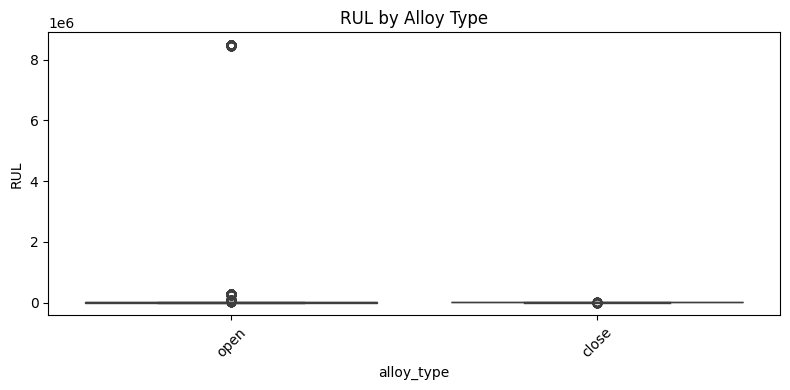

In [27]:
plt.figure(figsize=(8, 4))
sns.boxplot(
    x="alloy_type",
    y="RUL",
    data=df
)
plt.xticks(rotation=45)
plt.title("RUL by Alloy Type")
plt.tight_layout()
plt.show()


#### Equipment-Specific Behavior

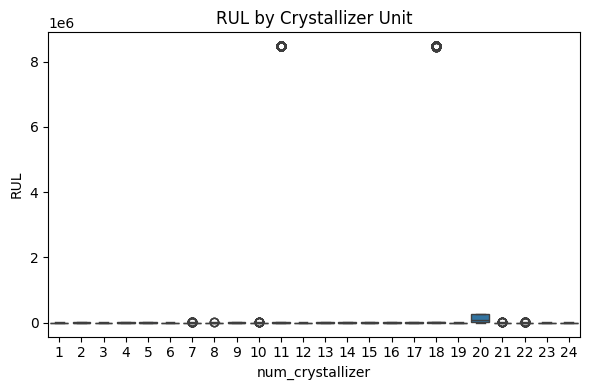

In [28]:
plt.figure(figsize=(6, 4))
sns.boxplot(
    x="num_crystallizer",
    y="RUL",
    data=df
)
plt.title("RUL by Crystallizer Unit")
plt.tight_layout()
plt.show()

## Thermal & Cooling Relationships

#### Temperature Delta Feature

In [29]:
df["temp_delta"] = (
    df["temperature_measurement2, Celsius deg."]
    - df["temperature_measurement1, Celsius deg."]
)

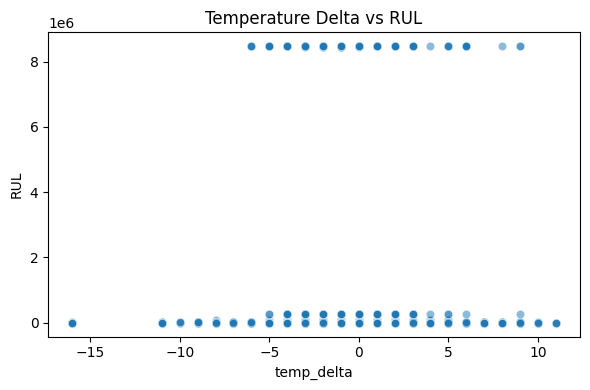

In [30]:
plt.figure(figsize=(6, 4))
sns.scatterplot(
    x="temp_delta",
    y="RUL",
    data=df,
    alpha=0.5
)
plt.title("Temperature Delta vs RUL")
plt.tight_layout()
plt.show()

#### Cooling Water Effect

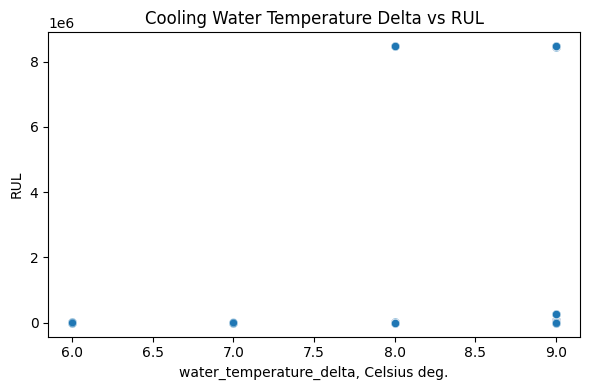

In [31]:
plt.figure(figsize=(6, 4))
sns.scatterplot(
    x="water_temperature_delta, Celsius deg.",
    y="RUL",
    data=df,
    alpha=0.5
)
plt.title("Cooling Water Temperature Delta vs RUL")
plt.tight_layout()
plt.show()

#### Chemical Composition Impact

In [32]:
chem_cols = [
    c for c in df.columns
    if c.endswith(", %")
]

chem_corr = (
    df[chem_cols + ["RUL"]]
    .corr()["RUL"]
    .sort_values()
)

chem_corr.head(10), chem_corr.tail(10)

(N, %    -0.076428
 Pb, %   -0.054763
 Mg, %   -0.043410
 Ti, %   -0.042451
 V, %    -0.039864
 Ce, %   -0.039603
 Mo, %   -0.036696
 Zn, %   -0.029748
 Si, %   -0.026824
 Nb, %   -0.025975
 Name: RUL, dtype: float64,
 C, %    -0.023892
 Cu, %   -0.018142
 Al, %   -0.015486
 Ca, %   -0.005086
 As, %   -0.003465
 S, %    -0.003094
 P, %     0.015468
 Sn, %    0.025871
 Ni, %    0.029446
 RUL      1.000000
 Name: RUL, dtype: float64)

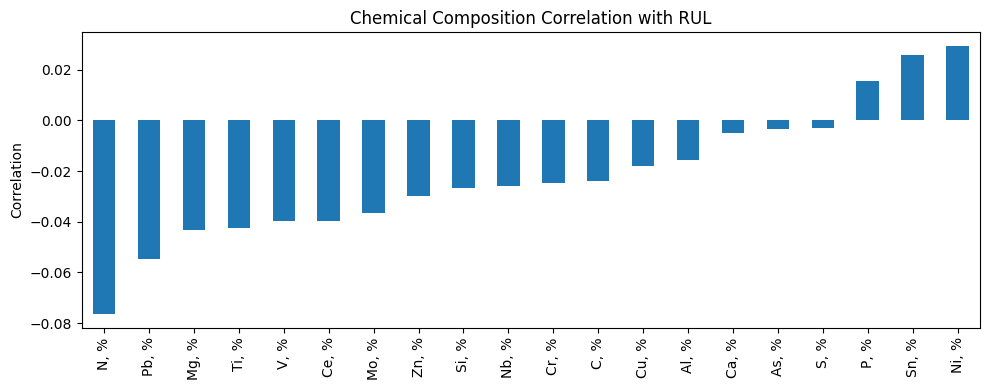

In [33]:
plt.figure(figsize=(10, 4))
chem_corr.drop("RUL").plot(kind="bar")
plt.title("Chemical Composition Correlation with RUL")
plt.ylabel("Correlation")
plt.tight_layout()
plt.show()

#### Key EDA Summary (Code-driven)

In [34]:
eda_summary = {
    "rows": df.shape[0],
    "columns": df.shape[1],
    "missing_pct_max": missing_pct.max(),
    "rul_min": df["RUL"].min(),
    "rul_max": df["RUL"].max(),
    "rul_skew": df["RUL"].skew(),
}

eda_summary


{'rows': 17503,
 'columns': 59,
 'missing_pct_max': 99.56578872193337,
 'rul_min': 0.0,
 'rul_max': 8473111.0,
 'rul_skew': 6.263148846945659}